In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score, auc
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.metrics import AUC
from keras import layers
# import tensorflow as tf
import keras_tuner as kt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Завантаження даних

In [43]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Вивчення даних

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [45]:
train_data.head(50)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [47]:
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


# Перетворення типу даних для меншого навантаження на пам'ять

In [48]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Вивчення кореляції даних з цільовим стовпчиком

In [49]:
train_data.corr()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,1.000000,-0.003724,0.000710,-0.001656,-0.003491,0.002325,0.001222,-0.003876,-0.003448,0.000107,...,0.003049,-0.003059,0.000834,-0.000900,-0.001278,0.000685,-0.000270,0.006935,-0.001382,-0.000632
age,-0.003724,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.212889,0.212972,0.160437,...,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033
height(cm),0.000710,-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,-0.090110,-0.091760,0.062297,...,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111
weight(kg),-0.001656,-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,-0.069761,-0.070679,0.241495,...,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748
waist(cm),-0.003491,-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.004759,0.006637,0.306150,...,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715
eyesight(left),0.002325,-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.067788,-0.070379,-0.030718,...,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420
eyesight(right),0.001222,-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.072888,-0.078285,-0.026931,...,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781
hearing(left),-0.003876,0.212889,-0.090110,-0.069761,0.004759,-0.067788,-0.072888,1.000000,0.553312,0.041887,...,-0.004135,-0.011467,-0.051724,-0.007248,-0.009447,-0.003497,-0.036896,-0.021820,-0.019155,-0.038219
hearing(right),-0.003448,0.212972,-0.091760,-0.070679,0.006637,-0.070379,-0.078285,0.553312,1.000000,0.041790,...,-0.003311,-0.012463,-0.049649,-0.004164,-0.009263,-0.001232,-0.036679,-0.017286,-0.016100,-0.036858
systolic,0.000107,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,0.041887,0.041790,1.000000,...,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642


# Збереження індексного стовпчика тестового набору для створення підсумкового файлу

In [50]:
y_id = test_data['id']

# Видалення стовпчиків даних з, практично, відсутньою кореляцією з цільовим стовпчиком даних

In [51]:
train_data.drop(columns=['id', 'weight(kg)', 'hearing(left)', 'hearing(right)', 'systolic', 'fasting blood sugar', 'Cholesterol', 'LDL', 'Urine protein', 'AST'], axis=1, inplace=True)
test_data.drop(columns=['id', 'weight(kg)', 'hearing(left)', 'hearing(right)', 'systolic', 'fasting blood sugar', 'Cholesterol', 'LDL', 'Urine protein', 'AST'], axis=1, inplace=True)

# Виділення цільового стовпчику та видалення його з навчального набору даних

In [52]:
y_tr = train_data['smoking']
train_data.drop(['smoking'], axis=1, inplace=True)

# Створення змінних наборів даних та розміру вхідних даних для нейронної мережі

In [53]:
X_tr = train_data
input_n = X_tr.shape[1]

# Нормалізація навчальних та тестових даних

In [54]:
# масив з назвами стовпчиків
names_columns_arr = X_tr.columns.tolist()
# перебіг по стовпчикам
for j in range(len(names_columns_arr)):
    expenses = X_tr[names_columns_arr[j]].values.reshape(-1, 1)  # Преобразувати у 2D-масив, як цього чекає MinMaxScaler
    scaler = MinMaxScaler()  # ініціалізувати MinMaxScaler
    scaler.fit(expenses)  # Підберіть масштабатор під свої дані
    # Тепер можна перетворити свої дані за допомогою масштабатора.
    normalized_expenses = scaler.transform(expenses)
    # нормалізація поточного стовпчика
    X_tr[names_columns_arr[j]] = normalized_expenses
# відновлення потрібного формату
X_tr = pd.DataFrame(X_tr)
# перебіг по стовпчикам
for j in range(len(names_columns_arr)):
    expenses = test_data[names_columns_arr[j]].values.reshape(-1, 1)  # Преобразувати у 2D-масив, як цього чекає MinMaxScaler
    scaler = MinMaxScaler()  # ініціалізувати MinMaxScaler
    scaler.fit(expenses)  # Підберіть масштабатор під свої дані
    # Тепер можна перетворити свої дані за допомогою масштабатора.
    normalized_expenses = scaler.transform(expenses)
    # нормалізація поточного стовпчика
    test_data[names_columns_arr[j]] = normalized_expenses
# відновлення потрібного формату
test_data = pd.DataFrame(test_data)

# Перегляд результату виконаних дій

In [55]:
X_tr.head()

,age,height(cm),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries
0,0.538462,0.545455,0.394737,0.040816,0.051020,0.483146,0.385224,0.244094,0.720497,0.091837,0.008239,0.025075,0.0
1,0.769231,0.545455,0.500000,0.051020,0.061224,0.438202,0.062005,0.377953,0.701863,0.102041,0.007552,0.035105,1.0
2,0.000000,0.636364,0.394737,0.030612,0.040816,0.348315,0.249340,0.283465,0.776397,0.071429,0.010299,0.051153,0.0
3,0.230769,0.818182,0.710526,0.142857,0.112245,0.494382,0.257256,0.228346,0.683230,0.091837,0.008926,0.028084,1.0
4,0.153846,0.545455,0.388158,0.142857,0.091837,0.359551,0.104222,0.275591,0.652174,0.071429,0.004119,0.015045,0.0


# Розподіл даних на навчальний та тестовий набори

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=0)


## Створення класифікаторів, початкових даних, масивів та пошук найкращого гіперпараметру з кількості ітерацій для кожного класифікатора

In [57]:
# одиничні класифікатори
lgr = LogisticRegression(solver='lbfgs')
rfc = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()
gbc = GradientBoostingClassifier(random_state=0)
# масив з класифікаторів
models = [lgr, rfc, xgb, gbc]
# масив з імен класифікаторів
models_name = ['lgr', 'rfc', 'xgb', 'gbc']
# масив кращих класифікаторів одиничних та нейронних мереж
models_class_best = list()
# масив назв кращих класифікаторів одиничних та нейронних мереж
models_class_best_names = list()
# масив з меседжів для розразованої площі для кожного класифікатора
models_msg = ['Площа під ROC кривою на тестовому наборі з класифікатором логістичної регресії:',
                  'Площа під ROC кривою на тестовому наборі з класифікатором випадковий ліс:',
                  'Площа під ROC кривою на тестовому наборі з класифікатором XGB:',
                  'Площа під ROC кривою на тестовому наборі з класифікатором GBC:'
                  ]
# список ваг для ансамблю з Begging
weights_arr = list()
# масив з класифікаторами для ансамблю з перехресною перевіркою
estimators_arr = list()
# кількість класифікаторів в кожному наборі
estimator_n = 5
# список класифікаторів з Begging
models_Bagg = list()
# початкова кількість ітерацій
nach_range = 300
# шаг зміни кількості ітерацій
step_range = 200
# кінечна кількість ітерацій
end_range = 1100
# розрахунок кількості стовпчиків у матриці моделей та ітерацій
d2_models_iter_arr = int(((end_range - nach_range)/step_range))
# створення матриці залежно від кількості моделей та різних кількостей ітерацій
# для збереження площ
models_iter_arr = np.zeros((len(models), d2_models_iter_arr))
# створення матриці залежно від кількості моделей та різних кількостей ітерацій
# для збереження прогнозів
# ініціалізація рядків та стовпчиків матриці
rows, cols = len(models), d2_models_iter_arr
# ініціалізація самої матриці
models_iter_arr_y_pred = [[None for _ in range(cols)] for _ in range(rows)]
# масив зі значеннями ітерацій
kol_iter_arr =list()

In [58]:
# лічильник шагів ітерацій
num_iter = 0
# перебіг по значенням ітерацій
for n_iter in range(nach_range, end_range, step_range ):
    # зміна гіперпараметів в класифікаторах в залежності від значення поточної ітерації
    lgr.max_iter=n_iter
    models[0] = lgr
    rfc.n_estimators=n_iter
    models[1] = rfc
    XGBClassifier(n_estimators=n_iter)
    models[2] = XGBClassifier()
    gbc.n_estimators=n_iter
    models[3] = gbc
    # додавання значення ітерації в масив
    kol_iter_arr.append(n_iter)
    # перебіг по моделям для поточного значення ітерації
    for i in range(len(models)):
        # навчання, прогноз, та розрахунок площі для поточної моделі
        models[i] = models[i].fit(X_train, y_train)
        y_pred = models[i].predict_proba(X_test)[:, 1]
        auroc = roc_auc_score(y_test, y_pred)
        # додання площі в комірку матриці
        models_iter_arr[i][num_iter] = auroc
        # додання прогнозу в комірку матриці
        models_iter_arr_y_pred[i][num_iter] = y_pred
        print(f'Кількість ітерацій {n_iter}, {models_msg[i]} {auroc:0.4f}')
    num_iter+=1


Кількість ітерацій 300, Площа під ROC кривою на тестовому наборі з класифікатором логістичної регресії: 0.8273
Кількість ітерацій 300, Площа під ROC кривою на тестовому наборі з класифікатором випадковий ліс: 0.8557
Кількість ітерацій 300, Площа під ROC кривою на тестовому наборі з класифікатором XGB: 0.8608
Кількість ітерацій 300, Площа під ROC кривою на тестовому наборі з класифікатором GBC: 0.8599
Кількість ітерацій 500, Площа під ROC кривою на тестовому наборі з класифікатором логістичної регресії: 0.8273
Кількість ітерацій 500, Площа під ROC кривою на тестовому наборі з класифікатором випадковий ліс: 0.8561
Кількість ітерацій 500, Площа під ROC кривою на тестовому наборі з класифікатором XGB: 0.8608
Кількість ітерацій 500, Площа під ROC кривою на тестовому наборі з класифікатором GBC: 0.8619
Кількість ітерацій 700, Площа під ROC кривою на тестовому наборі з класифікатором логістичної регресії: 0.8273
Кількість ітерацій 700, Площа під ROC кривою на тестовому наборі з класифікатором

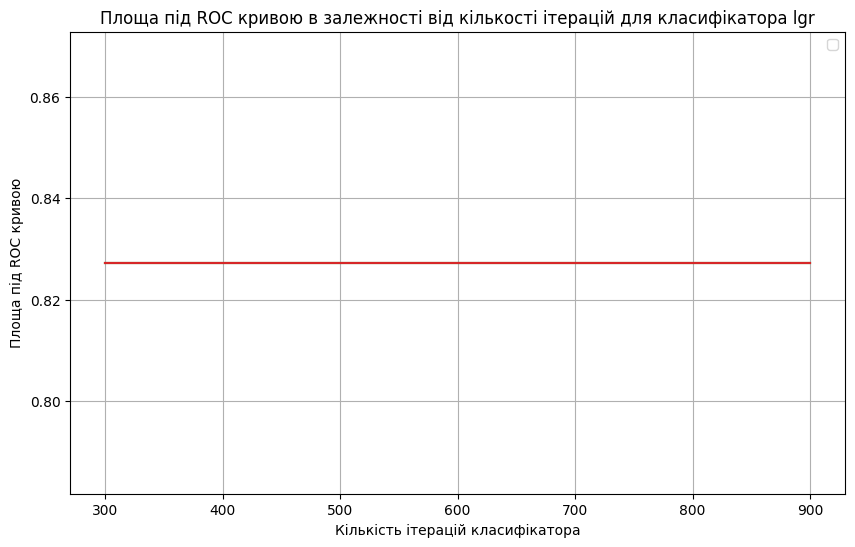

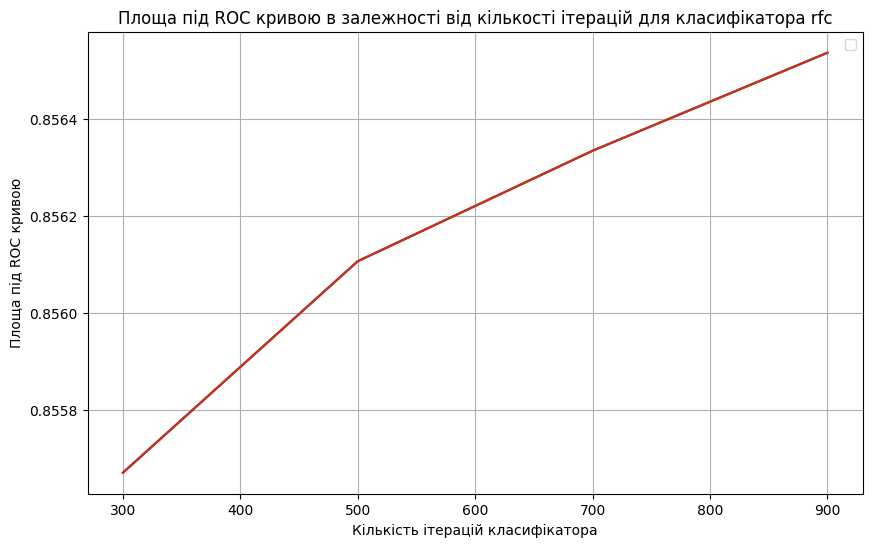

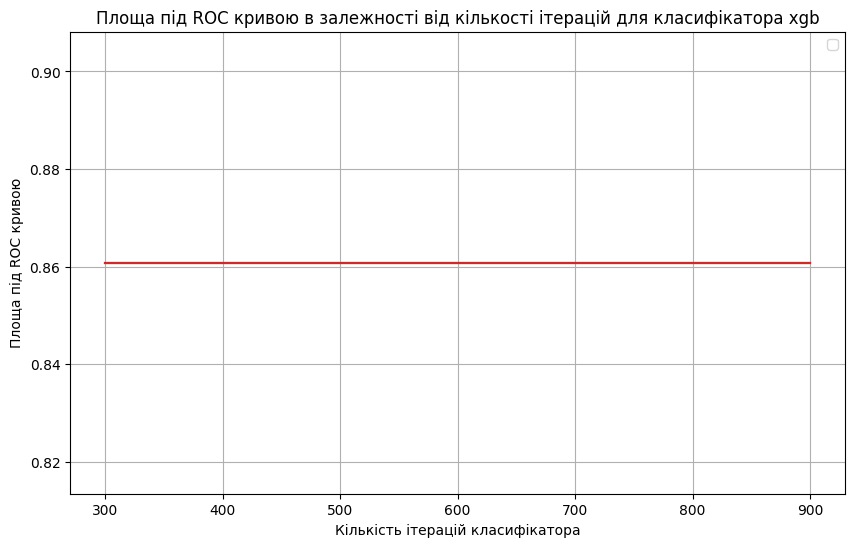

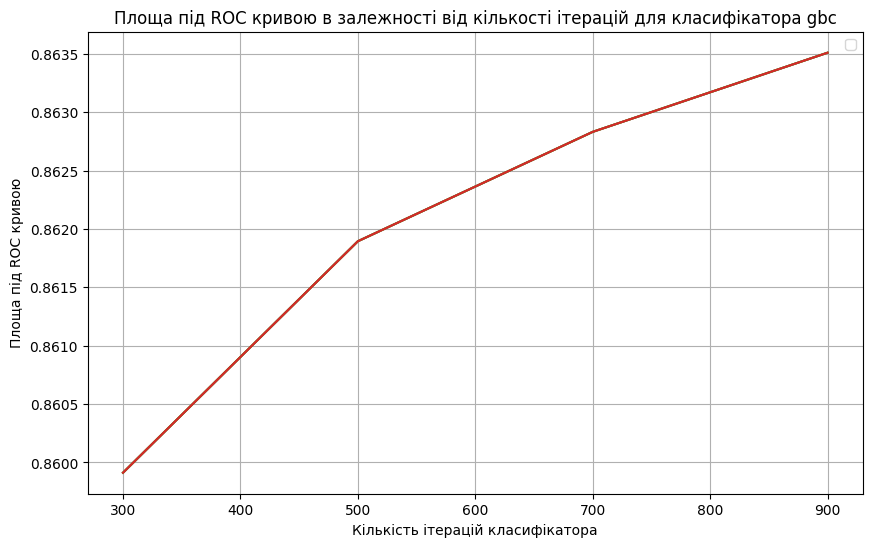

In [59]:
for j in range(len(models_name)):
    # Створення фігури після циклу
    plt.figure(figsize=(10, 6))
    for n_it in range(len(kol_iter_arr)):
       # Малювання графіків для різних класифікаторів з різними кількостями ітерацій
        plt.plot(kol_iter_arr, models_iter_arr[j][:])
    plt.xlabel('Кількість ітерацій класифікатора')
    plt.ylabel('Площа під ROC кривою')
    plt.title(f'Площа під ROC кривою в залежності від кількості ітерацій для класифікатора {models_name[j]}')
    plt.legend()
    plt.grid(True)
    plt.show()


# Вибираємо кращі гіперпараметри для класифікаторів

In [60]:
# індекси найбільшої площі в залежності від кількості ітерацій для кожного класифікатора
indexes_max_iters = np.argmax(models_iter_arr, axis=1)
# по індексу знаходимо найкраще значення кількості ітерацій
lgr.max_iter=kol_iter_arr[indexes_max_iters[0]]
models[0] = lgr
# прогноз відповідний найкращому значенню кількості ітерацій,
# для малювання графіку у подальшому
y_pred_lgr = models_iter_arr_y_pred[0][indexes_max_iters[0]]
rfc.n_estimators=kol_iter_arr[indexes_max_iters[1]]
models[1] = rfc
XGBClassifier(n_estimators=kol_iter_arr[indexes_max_iters[2]])
models[2] = XGBClassifier()
gbc.n_estimators=kol_iter_arr[indexes_max_iters[3]]
models[3] = gbc
# прогноз відповідний найкращому значенню кількості ітерацій,
# для малювання графіку у подальшому
y_pred_gbc = models_iter_arr_y_pred[3][indexes_max_iters[3]]

# Розрахунок площі під ROC для класифікаторів з кращими гіперпараметрами

In [61]:
# перебіг по моделям
for i in range(len(models_name)):
    # вилучення площі від кращих гіперпараметрів з комірки матриці
    auroc = models_iter_arr[i][indexes_max_iters[i]]
    # класифікатор після беггінгу
    modelBagg = BaggingClassifier(estimator=models[i], n_estimators=estimator_n, random_state=12)
    # массив для ансамблю классифікаиорів після беггінгу
    models_Bagg.append((models_name[i], modelBagg))
    # массив ваг (площ під ROC кривою) від кожного одиничного класифікатора
    weights_arr.append(auroc)
    # массив кортежей назв і моделей для ансамблю після перехресної перевірки
    estimators_arr.append((models_name[i], models[i]))
    print(f'{models_msg[i]} {auroc:0.4f}')

Площа під ROC кривою на тестовому наборі з класифікатором логістичної регресії: 0.8273
Площа під ROC кривою на тестовому наборі з класифікатором випадковий ліс: 0.8565
Площа під ROC кривою на тестовому наборі з класифікатором XGB: 0.8608
Площа під ROC кривою на тестовому наборі з класифікатором GBC: 0.8635


# Використовування кращого класифікатора
## Створимо умовного клієнта та нормалізуємо його дані

In [62]:
vip_guy = {'age': [40],
           'height(cm)': [165],
           'waist(cm)': [84],
           'eyesight(left)': [1.2],
           'eyesight(right)': [1.2],
           'relaxation': [1],
           'triglyceride': [1],
           'HDL': [40],
           'hemoglobin': [16.5],
           'serum creatinine': [1],
           'ALT': [25],
           'Gtp': [27],
           'dental caries': [0]}
# відновимо формат даних           
vip_guy_pd = pd.DataFrame(data=vip_guy)
# нормалізація створених даних
scaler = MinMaxScaler()
scaler.fit(vip_guy_pd)
vip_guy_scaled = scaler.transform(vip_guy_pd)

## Спрогнозуємо кращим класифікатором ймовірність того, що клієнт є курцем

In [63]:
# максимальна AUROC із класифікаторів
auroc_max = max(weights_arr)
# її індекс в масиві
ind_auroc_max = weights_arr.index(auroc_max)
# додавання в масив кращих класифікаторів одиничних та нейронних мереж
models_class_best.append(models[ind_auroc_max])
# додавання назви в масив назв кращих класифікаторів одиничних та нейронних мереж
models_class_best_names.append(models_name[ind_auroc_max])
# відновлення формату даних
# vip_guy_scaled_pd =pd.DataFrame(vip_guy_scaled)
preb_kl = models[ind_auroc_max].predict_proba(vip_guy_scaled)[:, 1]
pr_kl = preb_kl[0]
print(f"Цей клієнт по розрахунку класифікатора {models_name[ind_auroc_max]} з ймовірністю %0.2f відсоток(ків) є курцем" % ((100 * pr_kl) if pr_kl<=1 else 100))

Цей клієнт по розрахунку класифікатора gbc з ймовірністю 99.93 відсоток(ків) є курцем


In [64]:
# статично простий ансамбль після беггінгу
# задаємо метод голосування через більшість (hard voting)
# predict_proba неможливо при voting='hard'
# таким чином з метрикою AUROC неможливо використовувати метод голосування через більшість

In [65]:
# звільняємо пам'ять
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_gbc)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_lgr)
lgr = None
rfc = None
xgb = None
gbc = None

In [66]:
# статично зважений ансамбль після беггінгу
# задаємо метод голосування, що дає середнє арифметичне від суми передбачених ймовірностей (soft voting)
eclfbs = VotingClassifier(estimators=models_Bagg, voting='soft', weights=weights_arr)
eclfbs = eclfbs.fit(X_train, y_train)
y_predbagsoft = eclfbs.predict_proba(X_test)[:, 1]
roc_auc_accuracybagsoft = roc_auc_score(y_test, y_predbagsoft)
print(f'AUROC ансамблю після зваженого голосування та BAGGING {roc_auc_accuracybagsoft:0.4f}')

AUROC ансамблю після зваженого голосування та BAGGING 0.8610


In [67]:
# звільняємо пам'ять
models_Bagg = None
eclfbs = None

In [68]:
# статично простий ансамбль з перехресною перевіркою
# задаємо метод голосування через більшість (hard voting)
# predict_proba неможливо при voting='hard'
# таким чином з метрикою AUROC неможливо використовувати метод голосування через більшість

In [69]:
# задаємо метод голосування, що дає середнє арифметичне від суми передбачених ймовірностей (soft voting)
eclfs = VotingClassifier(estimators=estimators_arr, voting='soft', weights=weights_arr)
# прогноз після перехресної перевірки
predict_proba_soft = cross_val_predict(eclfs, X_test, y_test, method='predict_proba', cv=estimator_n)[:, 1]

In [71]:
roc_auc_accuracyscoressoft = roc_auc_score(y_test, predict_proba_soft)
#print(f'AUROC ансамблю після зваженого голосування та перехресної перевірки {roc_auc_accuracyscoressoft.mean():0.4f}')
print(f'AUROC ансамблю після зваженого голосування та перехресної перевірки {roc_auc_accuracyscoressoft:0.4f}')

AUROC ансамблю після зваженого голосування та перехресної перевірки 0.8563


In [72]:
# звільняємо пам'ять
eclfs = None
estimators_arr = None

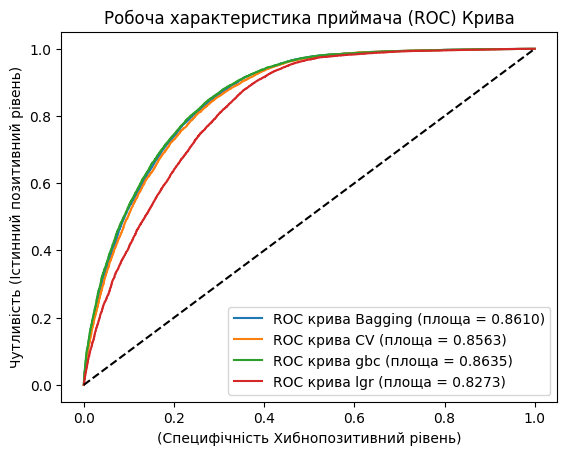

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_predbagsoft)
plt.plot(fpr, tpr, label='ROC крива Bagging (площа = %0.4f)' % roc_auc_accuracybagsoft)
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba_soft)
plt.plot(fpr1, tpr1, label='ROC крива CV (площа = %0.4f)' % roc_auc_accuracyscoressoft)
plt.plot(fpr2, tpr2, label=f'ROC крива {models_name[-1]} (площа = %0.4f)' % weights_arr[-1])
plt.plot(fpr3, tpr3, label=f'ROC крива {models_name[0]} (площа = %0.4f)' % weights_arr[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('(Специфічність Хибнопозитивний рівень)')
plt.ylabel('Чутливість (Істинний позитивний рівень)')
plt.title('Робоча характеристика приймача (ROC) Крива')
plt.legend(loc='lower right')
plt.show()

In [74]:
# створення бинарного прогнозу з ймовірного
y_pred_binarybagsoft = (y_predbagsoft > 0.5).astype(int)
# розрахунок точності
accuracybagsoft= accuracy_score(y_test, y_pred_binarybagsoft)
print(f"Точність ансамблю після зваженого голосування та BAGGING: {accuracybagsoft:0.4f}")

Точність ансамблю після зваженого голосування та BAGGING: 0.7774


In [75]:
# створення бинарного прогнозу з ймовірного
y_pred_binaryscoressoft = (predict_proba_soft > 0.5).astype(int)
# розрахунок точності
accuracyscoressoft= accuracy_score(y_test, y_pred_binaryscoressoft)
print(f"Точність ансамблю після зваженого голосування та перехресної перевірки: {accuracyscoressoft:0.4f}")

Точність ансамблю після зваженого голосування та перехресної перевірки: 0.7738


In [76]:
# створення бинарного прогнозу з ймовірного
y_pred_lgr = (models[0].predict_proba(X_test)[:, 1] > 0.5).astype(int)
# розрахунок точності
accuracylgr= accuracy_score(y_test, y_pred_lgr)
print(f"Точність класифікатру логістичної регресії: {accuracylgr:0.4f}")

Точність класифікатру логістичної регресії: 0.7411


In [77]:
# створення бинарного прогнозу з ймовірного
y_pred_gbc = (models[-1].predict_proba(X_test)[:, 1] > 0.5).astype(int)
# розрахунок точності
accuracygbc= accuracy_score(y_test, y_pred_gbc)
print(f"Точність GBC класифікатора: {accuracygbc:0.4f}")
models = None

Точність GBC класифікатора: 0.7795


# Розподіл набору на новий навчальний, перевірочний та тестовий набори для застосування нейронної мережі

In [78]:
X_train, X_temp, y_train, y_temp  = train_test_split(X_tr, y_tr, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test  = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [79]:
print(str(len(X_train))+' значень у навчальному наборі X_train,')
print(str(len(X_val))+' значень у перевірочному наборі X_val,')
print(str(len(X_test))+' значень у тестовому наборі X_test.')

95553 значень у навчальному наборі X_train,
31851 значень у перевірочному наборі X_val,
31852 значень у тестовому наборі X_test.


# Створення моделі послідовної нейронної мережі

In [80]:
model = Sequential()
model.add(Input(shape=(input_n,)))
model.add(Dense(input_n, activation='relu'))
model.add(Dense(input_n*2, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))


# Компіляція моделі з метрикою площи під ROC кривою та її навчання

In [81]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=["accuracy"])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[AUC(name='auc')])

In [82]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=128)

Epoch 1/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - auc: 0.7623 - loss: 0.5751 - val_auc: 0.8104 - val_loss: 0.5165
Epoch 2/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - auc: 0.8144 - loss: 0.5073 - val_auc: 0.8308 - val_loss: 0.4897
Epoch 3/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - auc: 0.8270 - loss: 0.4919 - val_auc: 0.8360 - val_loss: 0.4851
Epoch 4/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - auc: 0.8302 - loss: 0.4883 - val_auc: 0.8375 - val_loss: 0.4814
Epoch 5/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - auc: 0.8319 - loss: 0.4864 - val_auc: 0.8379 - val_loss: 0.4823
Epoch 6/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - auc: 0.8330 - loss: 0.4849 - val_auc: 0.8390 - val_loss: 0.4793
Epoch 7/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - auc: 0.8342 - loss: 0.4840 - val_auc: 0.8397 - val_loss: 0.4779
Epoch 8/150
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - auc: 0.8347 - loss: 0.4834 - val_auc: 0.8400 - val_loss: 0.4772
Epoch 9/150
747/747 ━━━━━━━━━━━━

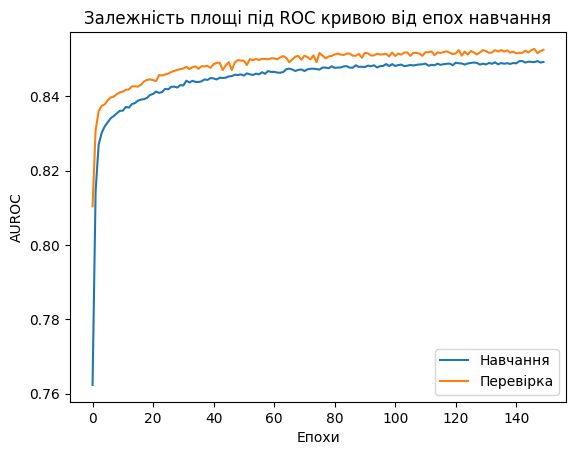

In [83]:
plt.plot(history.history["auc"])
plt.plot(history.history["val_auc"])
plt.ylabel("AUROC")
plt.xlabel("Епохи")
plt.legend(["Навчання", "Перевірка"], loc="lower right")
plt.title('Залежність площі під ROC кривою від епох навчання')
plt.show()

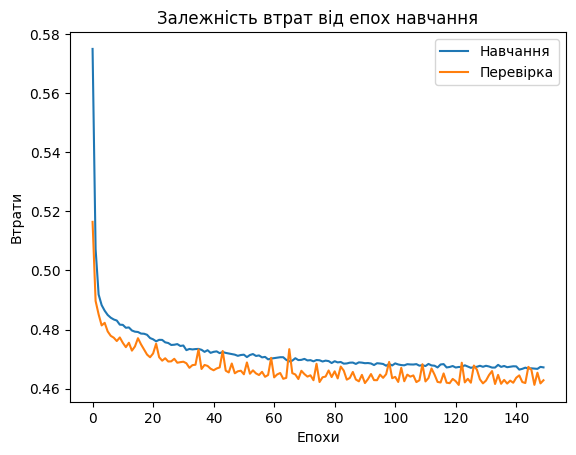

In [84]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Втрати")
plt.xlabel("Епохи")
plt.legend(["Навчання", "Перевірка"], loc="upper right")
plt.title('Залежність втрат від епох навчання')
plt.show()

In [85]:
# model.save('SmokingK123')
# reloaded_model = tensorflow.keras.models.load_model('SmokingK123')

In [86]:
# Прогнозування ймовірностей на тестових даних
y_pred_probnm = model.predict(X_test).flatten()
# Обчислення ROC-кривої
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_probnm)
# Обчислення AUC
roc_auc = auc(fpr4, tpr4)
# розрахунок втрат та площи під ROC кривою для навчального та перевіряльного наборів
loss, auroc_accuracy = model.evaluate(X_train, y_train)
loss, auroc_accuracyv = model.evaluate(X_val, y_val)
print(f'Показник AUROC, розрахований для:\n\tнавчальної вибірки: {str(round(auroc_accuracy,4))}\n\tперевірочної вибірки: {str(round(auroc_accuracyv,4))}\n\tтестової вибірки: {roc_auc:0.4f}')
model = None

996/996 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - auc: 0.8525 - loss: 0.4632
996/996 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - auc: 0.8526 - loss: 0.4628
Показник AUROC, розрахований для:
	навчальної вибірки: 0.8525
	перевірочної вибірки: 0.8526
	тестової вибірки: 0.8497


# Порівняльний графік класифікаторів

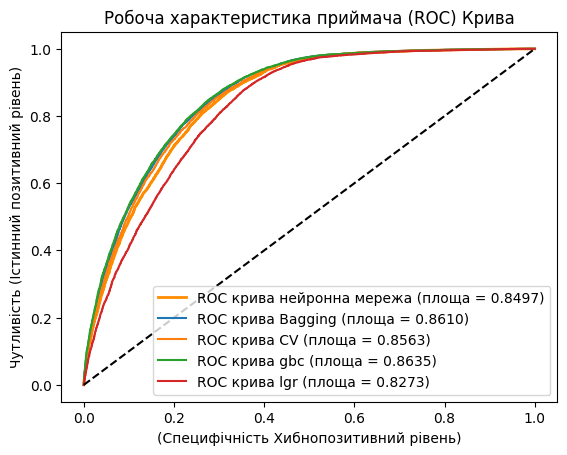

In [87]:
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'ROC крива нейронна мережа (площа = {roc_auc:0.4f})')
# fpr, tpr, thresholds = roc_curve(y_test, y_predbagsoft)
plt.plot(fpr, tpr, label='ROC крива Bagging (площа = %0.4f)' % roc_auc_accuracybagsoft)
# fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba_soft)
plt.plot(fpr1, tpr1, label='ROC крива CV (площа = %0.4f)' % roc_auc_accuracyscoressoft)
# fpr2, tpr2, thresholds2 = roc_curve(y_test, models[-2].predict_proba(X_test)[:, 1])
plt.plot(fpr2, tpr2, label=f'ROC крива {models_name[-1]} (площа = %0.4f)' % weights_arr[-1])
# fpr3, tpr3, thresholds3 = roc_curve(y_test, models[0].predict_proba(X_test)[:, 1])
plt.plot(fpr3, tpr3, label=f'ROC крива {models_name[0]} (площа = %0.4f)' % weights_arr[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('(Специфічність Хибнопозитивний рівень)')
plt.ylabel('Чутливість (Істинний позитивний рівень)')
plt.title('Робоча характеристика приймача (ROC) Крива')
plt.legend(loc='lower right')
plt.show()

# Встановлення тюнера для підбору гіперпараметрів моделі нейронної мережі

In [88]:
# якщо тюнера немає в середовищи виконання програми, то треба його встановити
# !pip install keras-tuner -q

In [89]:
# функція побудови моделі тюнером
def build_model(hp):
    # Вибір гіперпараметрів з об'єкта hp. Після вибору ці значення (наприклад,
      # Змінна units тут) стає звичайними константами Python
      # Доступні різні типи гіперпараметрів: Int, Float, Boolean, Choice
    model = Sequential()
    # визначаємо розмір вхідних даних змінною input_n(кількість стовпчиків у вхідному DataSet), що створили раніше
    model.add(Input(shape=(input_n,)))
    # перший шар мережі
    model.add(layers.Dense(input_n, activation='relu'))
    # Додавання шарів за номерами
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # додавання окремих чисел нейронів
                # units=hp.Int(f"units_{i}", min_value=input_n*2, max_value=input_n*10, step=input_n),
                units=hp.Int(f"units_{i}", min_value=input_n, max_value=input_n*10, step=input_n),
                # вибір типу активації
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    # додавання шару "dropout", якщо необхідно
    if hp.Boolean("dropout"):
        # model.add(layers.Dropout(rate=0.15))
        model.add(layers.Dropout(rate=0.25))
    # останній шар класифікації з одним нейроном
    model.add(layers.Dense(1, activation='sigmoid'))
    # швидкість навчання моделі
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # додавання кращого оптимізатора
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[AUC(name='auc')],
    )
    # функція повертає скомпільовану модель
    return model

In [90]:
# import keras_tuner as kt
tuner = kt.BayesianOptimization(
    # Вкажіть функцію створення моделі (або екземпляра HyperModel)
    build_model,
    # Вкажіть метрику, яку потрібно оптимізувати тюнер.
    # Завжди включайте показники, що базуються на тестових даних, тому що
    # Мета процесу пошуку - знайти модель з гарною спільністю!
    objective="val_auc",
    # Максимальна кількість конфігурацій моделі
    # («спроби») для тестування перед завершенням процесу пошуку
    max_trials=70,
    # Щоб зменшити дисперсію метрик, ви можете навчити ту саму модель
    # кілька разів і усередніть результати. Executions_per_trial визначає
    # кількість раундів навчання для кожної тестованої конфігурації моделі (спроби)
    executions_per_trial=3,
    # Каталог для збереження журналів результатів пошуку
    directory="Smoking_k123",
    # З приводу питання, чи варто перед запуском перезаписувати попередні дані в каталозі
    # новий пошук. Встановіть для цього параметра значення True, якщо ви змінили
    # функцію створення моделі та значення False для відновлення раніше розпочатого
    # пошуку з тією ж функцією створення моделі
    overwrite=False,
)

In [91]:
# Зарезервувати для майбутнього використання
X_train_full = X_tr
y_train_full = y_tr
callbacks = [
    # Використовуйте велику кількість епох (заздалегідь невідомо, скільки епох
    # потрібно для кожної моделі) і зворотний виклик EarlyStopping для
    # припиняємо тренування, коли відбувається перетренованість
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
]
# Цей метод приймає ті ж аргументи, що і fit() (він просто передає їх у
# виклик функції fit() для кожної нової моделі)
tuner.search(
    X_train, y_train,
    batch_size=128,
    epochs=70,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=2,
)

Trial 70 Complete [00h 00m 53s]
val_auc: 0.8519401748975118

Best val_auc So Far: 0.853540281454722
Total elapsed time: 01h 15m 46s


In [92]:
# дані трьох кращих гіперпараметрів
tuner.results_summary(num_trials=3)

Results summary
Results in Smoking_k123/untitled_project
Showing 3 best trials
Objective(name="val_auc", direction="max")

Trial 67 summary
Hyperparameters:
num_layers: 3
units_0: 104
activation: relu
dropout: False
lr: 0.0002288463525459598
optimizer: adam
units_1: 130
units_2: 65
units_3: 39
units_4: 130
Score: 0.853540281454722

Trial 50 summary
Hyperparameters:
num_layers: 3
units_0: 117
activation: relu
dropout: False
lr: 0.0001
optimizer: adam
units_1: 91
units_2: 52
units_3: 52
units_4: 130
Score: 0.8532345692316691

Trial 43 summary
Hyperparameters:
num_layers: 3
units_0: 130
activation: relu
dropout: False
lr: 0.0001
optimizer: adam
units_1: 65
units_2: 13
units_3: 117
units_4: 130
Score: 0.8531996806462606


In [93]:
top_n = 2 #виберіть кількість варіантів гіперпараметра
# Повертає список найкращих об'єктів HyperParameter, які можна передати
# у виклику функції створення моделі
best_hps = tuner.get_best_hyperparameters(top_n)
# nrl1=0
for q in range(1, top_n+1):
    nrl = best_hps[q-1].get("num_layers")
    # кількість додаткових шарів, якщо вони встановлювались в функції build_model
    #nrl1 = best_hps[q-1].get("num_layers1")
    print(f"Найкращий набір гіперпараметрів {q}")
    print(f"Кількість доданих шарів {nrl}")
    for numl in range(0, nrl):
        print(f"Шар №{numl}")
        print(f"Кількість нейронів у шарі: {best_hps[q-1].get(f'units_{numl}')}")
        print(f"Тип активації: {best_hps[q-1].get('activation')}")
    nesses = "НЕОБХІДНО додати шар" if best_hps[q-1].get("dropout") else "НЕ ПОТРІБНО додавати шар"
    print(f"{nesses} Dropout")
      # перебіг по додаткових шарах, якщо вони встановлювались в функції build_model
      # if nrl1>0:
          # print(f"Кількість доданих шарів1 {nrl1}")
          # for numl1 in range(0, nrl1):
              # print(f"Шар1 №{numl1}")
              # print(f"Кількість нейронів1 (units) у шарі "+str(best_hps[q-1].get("units1_"+str(numl))))
              # print(f"Тип активації1"+str(best_hps[q-1].get("activation1")))
              # nesses1 = "НЕОБХІДНО додати шар" if best_hps[q-1].get("dropout1") else "НЕ ПОТРІБНО додавати шар"
              # print(nesses1+" Dropout")

    print(f"Швидкість навчання моделі: {best_hps[q-1].get('lr')}")
    print(f"Тип оптимізатора: {best_hps[q-1].get('optimizer')}")
    print("-----------------------------------------------------\n")

Найкращий набір гіперпараметрів 1
Кількість доданих шарів 3
Шар №0
Кількість нейронів у шарі: 104
Тип активації: relu
Шар №1
Кількість нейронів у шарі: 130
Тип активації: relu
Шар №2
Кількість нейронів у шарі: 65
Тип активації: relu
НЕ ПОТРІБНО додавати шар Dropout
Швидкість навчання моделі: 0.0002288463525459598
Тип оптимізатора: adam
-----------------------------------------------------

Найкращий набір гіперпараметрів 2
Кількість доданих шарів 3
Шар №0
Кількість нейронів у шарі: 117
Тип активації: relu
Шар №1
Кількість нейронів у шарі: 91
Тип активації: relu
Шар №2
Кількість нейронів у шарі: 52
Тип активації: relu
НЕ ПОТРІБНО додавати шар Dropout
Швидкість навчання моделі: 0.0001
Тип оптимізатора: adam
-----------------------------------------------------



# Вибір кращих моделей після підбору гіперпараметрів

In [94]:
# # список з top_n найкращіх моделей
# models = tuner.get_best_models(top_n)
# if len(models)>1:
#     for j in range(0, (len(models))):
#         models[j].summary()
#         print("\n")
# else:
#     models[0].summary()

# найкраща модель    
model = tuner.hypermodel.build(best_hps[0])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 104)            │         1,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 130)            │        13,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 65)             │         8,515 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,869 (93.24 KB)

 Trainable params: 23,869 (93.24 KB)

 Non-trainable params: 0 (0.00 B)

# Розрахунок оптимальної кількості епох навчання

In [95]:
# оптимальна кількість епох навчання
def get_best_epoch(hp):
    model = build_model(hp)
    callbacks=[
        keras.callbacks.EarlyStopping(
            # Зверніть увагу на надзвичайно високе значення параметра терпіння.
            monitor="val_loss", mode="min", patience=10)
    ]
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=128,
        callbacks=callbacks)
    val_loss_per_epoch = history.history["val_loss"]
    # оптимальна кількість із меншими втратами за епоху
    best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
    print(f"Оптимальна кількість епох для моделі, навченої за допомогою навчального набору\nс {nvariant} варіантом кращих гіперпараметрів: {best_epoch}")
    return best_epoch

# Навчання кращих моделей на повному наборі даних

In [96]:
# навчання на повному наборі даних

def get_best_trained_model(hp):
    # оптимальна кількість епох
    best_epoch = get_best_epoch(hp)
    best_epochpoln = int(best_epoch * 1.2)
    #модель з найкращими гіперпараметрами
    model1 = build_model(hp)
    # навчання на повному наборі даних
    model1.fit(
        X_train_full, y_train_full,
        batch_size=128, epochs=best_epochpoln)
    return model1, best_epochpoln

best_models = []
nvariant = 1
fprb_arr = list()
tprb_arr = list()
thresholdsb_arr = list()
roc_aucb_arr = list()
# перебирання кращих варіантів гіперпараметрів
for hp in best_hps:
    # або взяти найкращі гіперпараметри (варіант 1)
    #hp = best_hps[0]
    # best model
    gbtm = get_best_trained_model(hp)
    # краща модель, навчана на повному наборі даних
    model2 = gbtm[0]
    # оптимаьна кількість епох для кращої моделі
    best_epochpoln = gbtm[1]
    # Площа під ROC кривою найкращої моделі на повних даних
    loss, roc_accuracy = model2.evaluate(X_train_full, y_train_full)
    print(f"Оптимальна кількість епох для кращої моделі, навчаної з повним набором\nз {nvariant} варіантом кращих гіперпараметрів: {best_epochpoln}")
    print(f'Площа під ROC кривою кращої моделі при навчанні на полному наборі\nз {nvariant} варіантом кращих гіперпараметрів: ' + str(round(roc_accuracy,4)))
    # додавання кращих моделей, навчених на повних даних, за кількістю кращих гіперпараметрів
    best_models.append(model2)
    # Прогнозування ймовірностей найкращої моделі, навченої на повних даних, на тестових даних
    y_pred_probnmb = model2.predict(X_test).flatten()
    # Обчислення ROC-кривої
    fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_probnmb)
    # Обчислення AUC
    roc_aucb = auc(fpr5, tpr5)
    # параметри графіків ROC кривих для кожної з кращіх моделей
    fprb_arr.append(fpr5)
    tprb_arr.append(tpr5)
    thresholdsb_arr.append(thresholds5)
    roc_aucb_arr.append(roc_aucb)
    nvariant += 1

Epoch 1/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.8081 - loss: 0.5150 - val_auc: 0.8299 - val_loss: 0.4887
Epoch 2/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8310 - loss: 0.4865 - val_auc: 0.8377 - val_loss: 0.4795
Epoch 3/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8361 - loss: 0.4810 - val_auc: 0.8404 - val_loss: 0.4768
Epoch 4/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.8382 - loss: 0.4787 - val_auc: 0.8423 - val_loss: 0.4749
Epoch 5/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.8406 - loss: 0.4757 - val_auc: 0.8446 - val_loss: 0.4716
Epoch 6/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.8420 - loss: 0.4742 - val_auc: 0.8462 - val_loss: 0.4694
Epoch 7/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.8429 - loss: 0.4729 - val_auc: 0.8471 - val_loss: 0.4676
Epoch 8/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8440 - loss: 0.4714 - val_auc: 0.8487 - val_loss: 0.4675
Epoch 9/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - au

# Вибір кращої з кращих мереж по критерію AUROC

In [97]:
# максимальне значення AUROC з кращіх нейронних мереж
max_roc_aucb_arr = max(roc_aucb_arr)
# індекс кращої мережі з максимальним значенням AUROC
ind_max_roc_auc = roc_aucb_arr.index(max_roc_aucb_arr)
# краща з кращіх моделей по критерію AUROC
best_model_for = best_models[ind_max_roc_auc]

# Порівняльний графік всих моделей класифікаторів

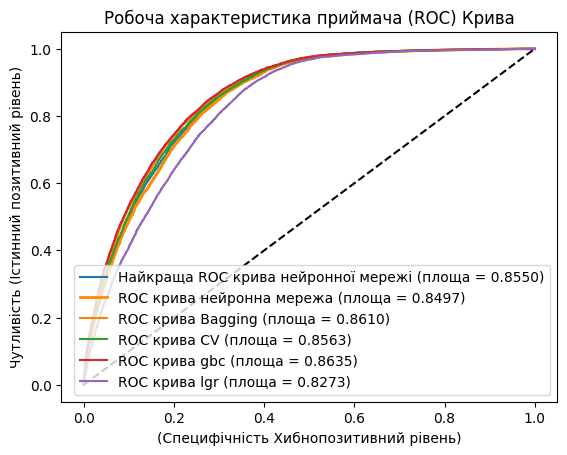

In [98]:
# for numc in range(len(fprb_arr)):
#     plt.plot(fprb_arr[numc], tprb_arr[numc], label=f'{numc+1} з найкращих ROC крива нейронної мережі (площа = {roc_aucb_arr[numc]:0.4f})')
plt.plot(fprb_arr[0], tprb_arr[0], label=f'Найкраща ROC крива нейронної мережі (площа = {max_roc_aucb_arr:0.4f})')
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'ROC крива нейронна мережа (площа = {roc_auc:0.4f})')
plt.plot(fpr, tpr, label='ROC крива Bagging (площа = %0.4f)' % roc_auc_accuracybagsoft)
plt.plot(fpr1, tpr1, label='ROC крива CV (площа = %0.4f)' % roc_auc_accuracyscoressoft)
plt.plot(fpr2, tpr2, label=f'ROC крива {models_name[-1]} (площа = %0.4f)' % weights_arr[-1])
plt.plot(fpr3, tpr3, label=f'ROC крива {models_name[0]} (площа = %0.4f)' % weights_arr[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('(Специфічність Хибнопозитивний рівень)')
plt.ylabel('Чутливість (Істинний позитивний рівень)')
plt.title('Робоча характеристика приймача (ROC) Крива')
plt.legend(loc='lower right')
plt.show()

# Структури найкращих моделей нейронної мережі, навчаних на повному наборі даних

In [99]:
# застосування цього, якщо не переучувати модель з нуля, буде швидшим, але менш якісним.
#best_models = Tuner.get_best_models(top_n)

# if len(best_models)>1:
#     for j in range(0, (len(best_models))):
#         best_models[j].summary()
#         print("\n")
# else:
#     best_models[0].summary()

# найкраща модель, навчана на повному наборі даних за оптимальну кількість епох
best_model_for.summary()

# додавання в масив кращих класифікаторів одиничних та нейронних мереж
models_class_best.append(best_model_for)
# додавання назви в масив назв кращих класифікаторів одиничних та нейронних мереж
models_class_best_names.append('Краща НМ')


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 117)            │         1,638 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 91)             │        10,738 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 52)             │         4,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            53 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,187 (203.86 KB)

 Trainable params: 17,395 (67.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,792 (135.91 KB)

## Спрогнозуємо ймовірність того, що раніше створений клієнт є курцем

In [100]:
# кращий одиничний класифікатор
gbc = models_class_best[0]
# навчання кращого одиничного класифікатора на повному наборі даних
gbc = gbc.fit(X_train_full, y_train_full)

In [101]:
# ймовірність позитивного класу кращим класифікатором
preb_kl = gbc.predict_proba(vip_guy_scaled)[:, 1]
pr_kl = preb_kl[0]

# ймовірність позитивного класу кращою нейронною мережею
prob = 1-best_model_for.predict(vip_guy_scaled).flatten()
pr = prob[0]
print(f"Цей клієнт за розрахунком кращого класифікатора {models_class_best_names[0]} з ймовірністю %0.2f відсоток(ків) є курцем" % ((100 * pr_kl) if pr_kl<=1 else 100))
print(f"\nЦей клієнт за розрахунком кращої нейронної мережі {models_class_best_names[1]} з ймовірністю %0.2f відсоток(ків) є курцем" % ((100 * pr) if pr<=1 else 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Цей клієнт за розрахунком кращого класифікатора gbc з ймовірністю 99.32 відсоток(ків) є курцем

Цей клієнт за розрахунком кращої нейронної мережі Краща НМ з ймовірністю 84.58 відсоток(ків) є курцем


# Створення підсумкового файлу

In [102]:
# ймовірність позитивного прогнозу кращої моделі на тестових даних
test_pred = 1-best_model_for.predict(test_data).flatten()
# створення підсумкового файлу
submission_df = pd.DataFrame({'id': y_id, 'smoking': test_pred})
# збереження підсумкового файлу
submission_df.to_csv('submission.csv', index=False)
# ймовірність позитивного прогнозу кращого одиничного класифікатора на тестових даних
test_pred1 = gbc.predict_proba(test_data)[:, 1]
# створення підсумкового файлу
submission_df1 = pd.DataFrame({'id': y_id, 'smoking': test_pred1})
# збереження підсумкового файлу
submission_df1.to_csv('submission1.csv', index=False)

3318/3318 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step
